## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
data = pd.read_csv('ex1data1.csv')
data = data.to_numpy()#To convert the Pandas DataFrame to a NumPy array.
data[:5]

array([[ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233],
       [ 8.3829, 11.886 ]])

In [3]:
def load_data():
    x=[]
    y=[]
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    return x,y

In [4]:
x_train, y_train=load_data()
x_train[:5]

[5.5277, 8.5186, 7.0032, 5.8598, 8.3829]

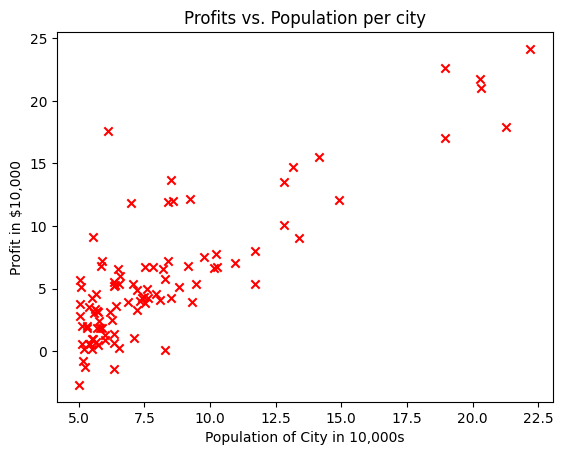

In [5]:
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [6]:
#Squared error cost function -->

def cost_function (x, y, w, b):
    m = len(x)
    f_wb= np.dot(w,x)+b
    cost=0
    total =0
    for i in range(m):
        total +=(f_wb[i]-y[i])**2
    cost = total/(2*m)
    return cost

In [7]:
# This is just for test purpose -->
wt= 2
bt = 1
cost = cost_function(x_train, y_train , wt, bt)
print(cost)

75.2033849789196


In [8]:
# Derivative part of the Gradient Descent -->
def compute_gradient(x, y, w, b):
    m = len(x)
    f_wb = np.dot(w,x)+b
    dj_dw = 0
    dj_db = 0
    total = 0
    for i in range(m):
        dj_db  += f_wb[i]-y[i]
        dj_dw += (f_wb[i]-y[i])*x[i]
    dj_db =dj_db/m
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [9]:
#this is just for test purpose -->
w_in= 0
b_in= 0
train = compute_gradient(x_train , y_train, w_in , b_in)
train

(-65.32884974555674, -5.839135051546389)

In [15]:
#Gradient Descent function -->
def gradient_function( x, y , w , b , compute_gradient,cost_function, alpha, num_iters):
    w_arr=[]
    j_arr=[]
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b -alpha* dj_db
        w = w - alpha * dj_dw
        j = cost_function(x, y, w, b)
        w_arr.append(w)
        j_arr.append(j)
    return w, b,w_arr,j_arr,j

In [28]:
# fitting parameter 
def fitting_parameter(alpha, total_iteration):
    initial_w = 0
    initial_b=0
    w_arr=[]
    j_arr=[]
    w,b, w_arr, j_arr,j = gradient_function(x_train , y_train, initial_w,initial_b, compute_gradient,cost_function, alpha,total_iteration)
    print("w,b found by gradient descent:", w, b)
    print("Minimum cost : ", j )
    # plot cost versus iteration  
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    ax1.plot(j_arr)
    ax2.plot(1000+ np.arange(len(j_arr)), j_arr)
    ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
    ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
    ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
    plt.show()
    return w,b 

w,b found by gradient descent: 1.166362350335582 -3.63029143940436
Minimum cost :  4.483388256587727


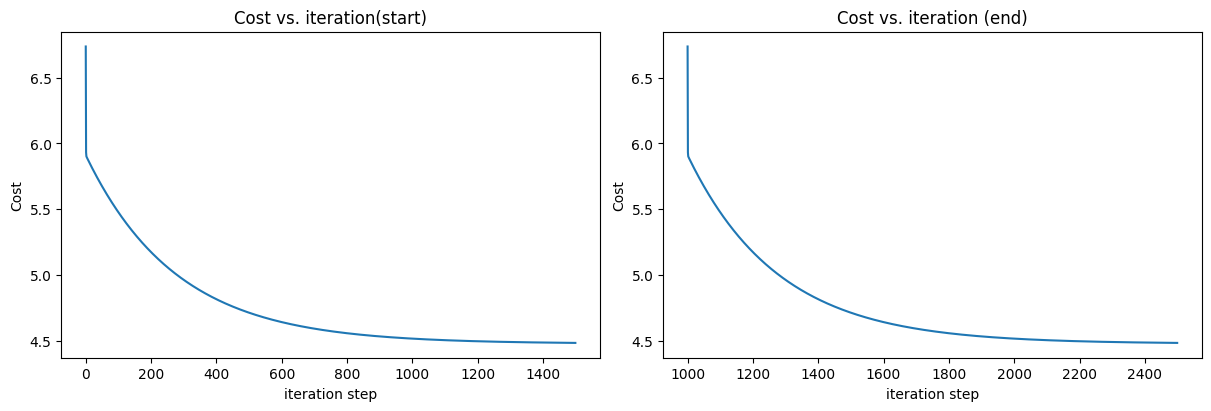

In [33]:
#Initializing the fitting parameter 
w,b = fitting_parameter(0.01, 1500)

In [34]:
m = len(x_train)
prediction = np.zeros(m)
for i in range(m):
    prediction[i]= w*x_train[i]+b


Text(0.5, 0, 'Population of City in 10,000s')

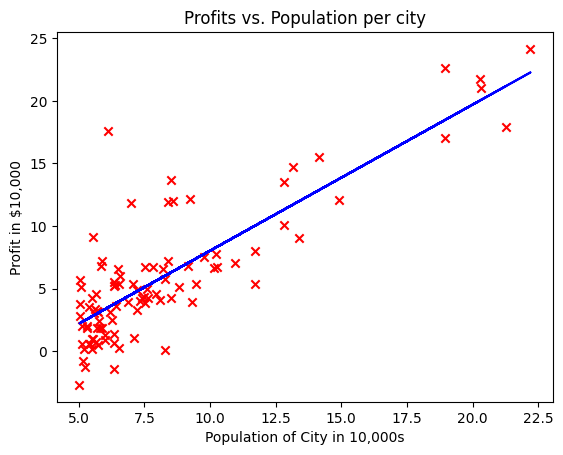

In [35]:
# Plot the linear fit.
plt.plot(x_train,prediction, c='b')

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")

# Set the y-axis label
plt.ylabel('Profit in $10,000')

# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [36]:

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
